# Section 9 Introduction to Data Science

# What is Data Science?

Three correlated concepts: 
- Data Science
- Artificial Intelligence 
- Machine Learning

[Battle of the Data Science Venn Diagrams ](https://www.kdnuggets.com/2016/10/battle-data-science-venn-diagrams.html)

The original Venn diagram from Drew Conway:

<div>
<img src="./img/Data_Science_VD.png" width="300">
</div>

Another diagram from Steven Geringer:

<div>
<img src="./img/moz-screenshot-3-729576.png" width="400">
</div>

Another version:

<div>
<img src="./img/1_-XKVI5SAEpffNR7BusdvNQ.png" width="300">
</div>

Perhaps the reality should be:
<div>
<img src="./img/DataScienceDisciplines.png" width="400">
</div>
<div>
<img src="./img/tumblr_m74i4eR9Ym1qa0uujo1_1280.jpg" width="300">
</div>

[David Robinson's Auto-pilot example](http://varianceexplained.org/r/ds-ml-ai/):
- machine learning: **predict** whether there is a stop sign in the camera
- artificial intelligence: design the **action** of applying brakes (either by rules or from data)
- data science: provide the **insights** why the system does not work well after sunrise

**Peijie's Definition**:
Data Science is the science 
- *of* the data -- what
- *by* the data -- how
- *for* the data -- why

# Mathematics of Data 

### Representation of Data

What data do we have, and how to relate it with math objects?

#### **Tabular Data**

In [6]:
import pandas as pd
import numpy as np
df_house = pd.read_csv('./data/kc_house_data.csv')
print(df_house.shape)   
df_house.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- A structured data table, with $n$ observations and $p$ variables.
- **Mathematical representation**: The data *matrix* $X\in\mathbb{R}^{n\times p}$. For notations we write
<center>
$X=\left(
 \begin{matrix}
   \mathbf{x}^{(1)}\\
   \mathbf{x}^{(2)} \\
   \cdots \\
   \mathbf{x}^{(n)}
  \end{matrix} 
\right)
$, where the $i$-th row vector represents $i$-th observation, $\mathbf{x}^{(i)}=\left(x_{1}^{(i)},\dots,x_{p}^{(i)}\right)\in\mathbb{R}^{p}$.</center>

To really emphasize that each element is a row, we can also write $X$ as:
<center>
$X=\left(
 \begin{matrix}
   \mathbf{x}^{(1)} \longrightarrow\\
   \mathbf{x}^{(2)} \longrightarrow\\
   \cdots \\
   \mathbf{x}^{(n)} \longrightarrow
  \end{matrix} 
\right)
$</center>

    
- [Example: Precision Medicine and Single-cell Sequencing.](https://learn.gencore.bio.nyu.edu/single-cell-rnaseq/)
<div>
<img src="./img/scRNA-overview.jpg" width="400">
</div>

- *Roughly speaking*, big data -- large $n$, high-dimensional data -- large $p$.

#### **Time-series Data**

        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001


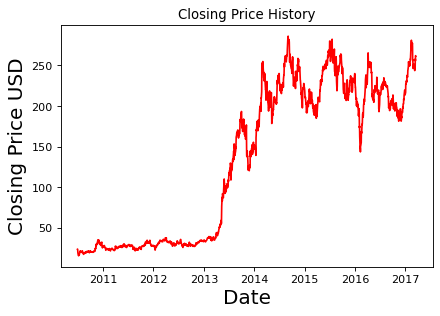

In [7]:
import matplotlib.pyplot as plt
ts_tesla = pd.read_csv('./data/Tesla.csv')
print(ts_tesla.head())

ts_tesla['Date'] = pd.to_datetime(ts_tesla['Date'])
ts_tesla.set_index('Date',inplace=True)

# Suppose we only focus on the time-series of close price
plt.figure(dpi=80)
plt.title('Closing Price History')
plt.plot(ts_tesla['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD', fontsize = 18)
plt.show()
# this is only about tesla -- we can also have the time-series of apple,amazon,facebook...

- Simple case: $N$ one-dimensional trajectories with each sampled at $T$ time points.
- **Mathematical representation I**: Still use the data *matrix* $X\in\mathbb{R}^{N\times T}$. For notations we write
<center>
$X=\left(
 \begin{matrix}
   \mathbf{x}^{(1)}\\
   \mathbf{x}^{(2)} \\
   \cdots \\
   \mathbf{x}^{(N)}
  \end{matrix} 
\right)
$, where the $i$-th row vector represents $i$-th trajectory, $\mathbf{x}^{(i)}=(x_{1}^{(i)},\dots,x_{T}^{(i)})\in\mathbb{R}^{T}$.
</center>
- Question: The difference with tabular data?
- **Mathematical representation II**: Each trajectory is a *function* of time $t$. The whole dataset can be represented as $z=f(\omega,t)$ where $\omega$ represents the sample and $t$ represents the time. In probability theory, this is called *stochastic process*.
    - For fixed $\omega$, we have a trajectory, which is the function of time. 
    - For fixed $t$, we obtain an ensemble drawn from random distribution. 
- Question: How about $N$ $d$-dimensional trajectories with each sampled at $T$ time points?
- [Example: Electroencephalography (EEG) data and Parkinson's disease](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3858815/).
<div>
<img src="./img/3-Figure1-1.png" width="600">
</div>

#### **Images**
Example: [MNIST handwritten digits data](http://yann.lecun.com/exdb/mnist/):Each image is 28x28 matrix

In [7]:
import pandas as pd
mnist = pd.read_csv('./data/train.csv') # stored as data table
#mnist.sample(5)
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
mnist.shape

(42000, 785)

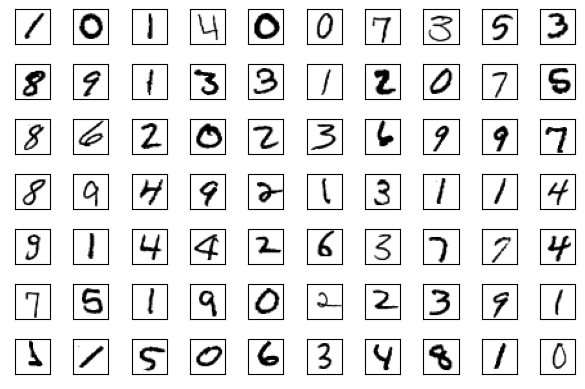

In [3]:
target = mnist['label']
mnist = mnist.drop("label",axis=1)

import matplotlib.pyplot as plt
plt.figure(dpi=100)
for i in range(0,70): #plot the first 70 images
    plt.subplot(7,10,i+1)
    grid_data = mnist.iloc[i,:].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data,cmap='gray_r', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

- Simple case: N grayscale images with $m\times n$ pixels each.
- **Mathematical Representation I**: Each image can be represented by a matrix $I\in\mathbb{R}^{m\times n}$, whose elements denotes the intensities of pixels. The whole datasets have $N$ matrices of $m$ by $n$, or represented by a $N\times m\times n$ *tensor*.

[Illustrated Introduction to Linear Algebra using NumPy](https://medium.com/@kaaanishk/illustrated-introduction-to-linear-algebra-using-numpy-11d503d244a1)
<div>
<img src="./img/1_hd0aMCRIDbyFQo5lYgb5Fw.jpeg" width="400" >
</div>

- **Mathematical representation II**: *Random field model* $z=\mathbf{f}(\omega,x,y)$.


- **Color images**: Decompose into RGB (red,green and blue) channels and 
    - use three matrices (or three-dimensional tensor) to represent one image, or 
    - build the random field model with vector-valued functions $z=\mathbf{f}(\omega,x,y)\in \mathbb{R}^{3}$
    
[convolutional neural networks](https://www.esantus.com/blog/2019/1/31/convolutional-neural-networks-a-quick-guide-for-newbies)

<div>
<img src="./img/conv_rgb.png" width="400">
</div>
- Question: Can image datasets also be transformed into tabular data? What are the pros/cons?

In [19]:
mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Videos**

- *Time-series* of images, or *random field* model $z=\mathbf{f}(\omega,x,y,t)$

#### **Texts**

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['He is a good person',
          'He is bad student',
          'He is hardworking']
df = pd.DataFrame(data=corpus, columns=['sentences'])
print(df)
vectorizer = CountVectorizer(vocabulary=['he', 'is', 'a', 'good', 'person', 'bad', 'student', 'hardworking'], min_df=0,
                             stop_words=frozenset(), token_pattern=r"(?u)\b\w+\b")
X = vectorizer.fit_transform(df['sentences'].values)
result = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
result.head()

             sentences
0  He is a good person
1    He is bad student
2    He is hardworking


,he,is,a,good,person,bad,student,hardworking
0,1,1,1,1,1,0,0,0
1,1,1,0,0,0,1,1,0
2,1,1,0,0,0,0,0,1


- **Proposal I**: Tabular data by extracting key words. "Document-Term Matrix"
    - useful in sentiment analysis, document clustering, topic modelling
    - popular algorithms include tf-idf,Word2Vec,bag of words, etc.
- **Proposal II**: Time-series of individual words.
    - useful in machine translation
    
[Recurrent neural network model for machine translations](https://smerity.com/articles/2016/google_nmt_arch.html)

<div>
<img src="./img/gnmt_arch_1_enc_dec.svg" width="500">
</div>

#### **Networks**

- Concepts: node/edge/weight, directed/undirected
- **Mathematical Representation**: adjacency matrix
- Question: what about the whole datasets of networks, and time-evolving networks?

# Tasks with Data: Machine Learning

The tasks with data can often be transfromed into *machine learning* problems, which can be generally classified as:
- Supervised Learning -- "learning with training";
- Unsupervised Learning -- "learning without training";
- Reinforcement Learning -- "learning by doing".

Our course will focus on the first two categories.

## **Supervised Learning**

- Given the *training dataset* $\left(x^{(i)},y^{(i)}\right)$ with $y^{(i)}\in \mathbb{R}^{q}$ denotes the *labels*, the supervised learning aims to find a mapping $\mathbf{f}:\mathbb{R}^{p}\to\mathbb{R}^{q}$ such that $y^{(i)}\approx\mathbf{f}\left(x^{(i)}\right)$. Then with a new observation $x^{(new)}$, we can predict that $y^{(new)}=\mathbf{f}\left(x^{(new)}\right)$.

    - when $y\in\mathbb{R}$ is continuous, the problem is also called as *regression*. **Example**: Housing price prediction
    - when $y\in\mathbb{R}$ is discrete, the problem is also called as *classification*. **Example**: Handwritten digit recognization


- **Practical Strategy**: Limit the mapping $\mathbf{f}$ to certain space by parametrization $\mathbf{f(x;\theta)}$. Then define the loss function of $\theta$
<center>$L(\theta)=\sum\limits_{i=1}^{n}\ell\left(y^{(i)},\mathbf{f}\left(x^{(i)}\right)\right),$ </center> where $\ell$ quantifies the "distance" between $y^{(i)}$ and $\mathbf{f}(x^{(i)})$, and a common choice is mean squre error (MSE) for continous data $\ell\left(y^{(i)},\mathbf{f}\left(x^{(i)}\right)\right)=\left|\left|y^{(i)}-\mathbf{f}(x^{(i)})\right|\right|^{2}$. We then seek to choose the optimal $\theta$ that minimizes the loss function<center>$\theta^{*}=\mathop{\mathrm{argmin}}\limits_{\theta}L(\theta),$</center>
which can be tacked numerically by optimzation methods (including the popular stochastic gradient descent).


- Difference choice of $\mathbf{f(x;\theta)}$ leads to various supervised learning models:
    - Linear function : Linear Regression (for regression)/Logistic Regression (for classification)
    -For 1D Linear Regression (finding a line of best fit $y = \omega x + b$), we have $\mathbf{f(x;\theta)} = \mathbf{f(x;\omega, b)} = \omega x + b$
    - Composition of linear + nonlinear functions: Neural Network
    
    
- **Important Terms**:
    - **Training Data**: Both X and y are provided. The dataset which we use to fit the function.
    - **Test Data**: In principle, only X is provided (some times $y^{test}$ is also provided as the ground-truth to verify). The dataset which we generate new predictions $y^{pred}$. -- This is the final judgement of your unsupervised ML model!
    - **Validation Data**: A good-fit model on training data does not guarantee the good performance on test data. To gain more confidence before really applying to test data, we "fake" some test data as the "sample exam". To do this, we further split the original training data into new traning data and validation data, and then learn the mapping on new training data, and judge on the validation data. We may make some adjustment if the model does not perform well in the "sample exam".
    - Intuitive Understanding: Training data is like quizzes -- you want to learn the "mapping" between the question and correct answer. Test data is like your exam. Validation is like you take a sample exam before the real exam and make some "clinics" about your weakpoints.
    - See the illustration [here](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)

**Example:** The [Wisconsin breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) and low-code ML package [pycaret](https://pycaret.org/).

Install pycaret -- it's a new package, not included with Anaconda

In [9]:
pip install --upgrade pycaret

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.datasets import load_breast_cancer # load the dataset
X,y = load_breast_cancer(as_frame = True,return_X_y = True)

In [11]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In this dataset, all labels are known. To mimic a real situation, we manully create train and test datasets.

In [13]:
from sklearn.model_selection import train_test_split # manually split into train and test by random sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [14]:
X_train.shape

(381, 30)

In [15]:
y_test.shape

(188,)

In [16]:
import pandas as pd
data_train = pd.concat([X_train,y_train],axis=1) # the whole data table of training
data_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
56,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.089940,0.1917,0.05961,...,28.14,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294,0
144,10.750,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769,1
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.012900,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.058430,0.1550,0.04996,...,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.014060,0.1506,0.06959,...,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136,1
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.000000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559,1


In [17]:
from pycaret.classification import setup
from pycaret.classification import compare_models

bc = setup(data=data_train, target='target') # target is the y column name we want to predict

,Description,Value
0,session_id,2656
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(381, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
best = compare_models() # pycaret automatically fits different ML models for you, and compare their performance on the training dataset with cross-validation!

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9664,0.9814,0.9820,0.9669,0.9737,0.9269,0.9296,0.0890
et,Extra Trees Classifier,0.9664,0.9841,0.9824,0.9666,0.9739,0.9266,0.9287,0.0680
ada,Ada Boost Classifier,0.9625,0.9775,0.9765,0.9660,0.9709,0.9181,0.9192,0.0400
qda,Quadratic Discriminant Analysis,0.9588,0.9842,0.9765,0.9607,0.9681,0.9102,0.9123,0.0070
lda,Linear Discriminant Analysis,0.9587,0.9876,0.9879,0.9512,0.9685,0.9083,0.9123,0.0060
lightgbm,Light Gradient Boosting Machine,0.9587,0.9842,0.9706,0.9657,0.9675,0.9106,0.9125,0.1510
gbc,Gradient Boosting Classifier,0.9585,0.9807,0.9702,0.9657,0.9675,0.9100,0.9115,0.0590
ridge,Ridge Classifier,0.9473,0.0000,0.9875,0.9340,0.9594,0.8840,0.8894,0.0060
lr,Logistic Regression,0.9437,0.9873,0.9643,0.9489,0.9559,0.8779,0.8807,0.6660
nb,Naive Bayes,0.9437,0.9853,0.9640,0.9499,0.9560,0.8776,0.8813,0.0060


In [19]:
best # the best model selected by pycaret

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2656, verbose=0,
                       warm_start=False)

In [20]:
from pycaret.classification import predict_model
predict_model(best); # predict on the validation data that pycaret have selected -- sample exam!

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9478,0.9958,0.9552,0.9552,0.9552,0.8927,0.8927


In [21]:
from pycaret.classification import finalize_model
best_final = finalize_model(best) # re-train the dataset with whole input training data

In [22]:
from pycaret.classification import predict_model
predictions = predict_model(best_final, data = X_test) # make new predictions on new-coming patients, with best model selected
predictions

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,Score
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0,0.98
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1,0.96
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1,0.98
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1,0.94
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397,0,0.53
336,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,0.07238,...,87.38,576.0,0.11420,0.19750,0.14500,0.05850,0.2432,0.10090,1,0.98
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,...,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777,1,1.00
347,14.76,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,...,114.20,880.8,0.12200,0.20090,0.21510,0.12510,0.3109,0.08187,1,0.88


In [23]:
df_compare = pd.concat([predictions['Label'],y_test],axis = 1) # compare with the ground-truth
df_compare

,Label,target
512,0,0
457,1,1
439,1,1
298,1,1
37,1,1
...,...,...
100,0,0
336,1,1
299,1,1
347,1,1


In [24]:
import numpy as np
np.mean(predictions['Label'].to_numpy() == y_test.to_numpy()) # calculate the percentage of accurate predictions (accuracy)
#mean of the number of matches, using a boolean test on the array.

0.9627659574468085

In [25]:
from pycaret.classification import create_model
lr = create_model('lr') # what if we only want the logistic regression model?

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9630,1.0000,1.0000,0.9444,0.9714,0.9189,0.9220
1,0.9630,1.0000,0.9412,1.0000,0.9697,0.9222,0.9250
2,0.9259,0.9824,0.9412,0.9412,0.9412,0.8412,0.8412
3,0.9259,0.9471,0.9412,0.9412,0.9412,0.8412,0.8412
4,0.9259,1.0000,1.0000,0.8947,0.9444,0.8344,0.8460
5,0.9259,0.9882,0.9412,0.9412,0.9412,0.8412,0.8412
6,0.9231,0.9812,0.9375,0.9375,0.9375,0.8375,0.8375
7,0.9615,0.9869,1.0000,0.9444,0.9714,0.9128,0.9162
8,0.9615,0.9869,0.9412,1.0000,0.9697,0.9172,0.9204
9,0.9615,1.0000,1.0000,0.9444,0.9714,0.9128,0.9162


In [26]:
predict_model(lr) # validation dataset -- sample exam!

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9391,0.9925,0.9403,0.9545,0.9474,0.8752,0.8754


,mean radius,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Label,Score
0,16.129999,17.879999,807.200012,0.10400,0.15590,0.13540,0.077520,0.1998,0.06515,0.3340,...,1261.000000,0.14460,0.58040,0.52740,0.18640,0.4270,0.12330,0,0,0.9998
1,19.889999,20.260000,1214.000000,0.10370,0.13100,0.14110,0.094310,0.1802,0.06188,0.5079,...,1646.000000,0.14170,0.33090,0.41850,0.16130,0.2549,0.09136,0,0,1.0000
2,17.750000,28.030001,981.599976,0.09997,0.13140,0.16980,0.082930,0.1713,0.05916,0.3897,...,1437.000000,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075,0,0,1.0000
3,13.900000,19.240000,602.900024,0.07991,0.05326,0.02995,0.020700,0.1579,0.05594,0.3316,...,830.500000,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603,1,0,0.5085
4,11.680000,16.170000,420.500000,0.11280,0.09263,0.04279,0.031320,0.1853,0.06401,0.3713,...,549.799988,0.15260,0.14770,0.14900,0.09815,0.2804,0.08024,1,1,0.9903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,14.290000,16.820000,632.599976,0.06429,0.02675,0.00725,0.006250,0.1508,0.05376,0.1302,...,684.599976,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1,1,0.9992
111,16.459999,20.110001,832.900024,0.09831,0.15560,0.17930,0.088660,0.1794,0.06323,0.3037,...,981.200012,0.14150,0.46670,0.58620,0.20350,0.3054,0.09519,0,0,0.9270
112,9.668000,18.100000,286.299988,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,0.3416,...,380.200012,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875,1,1,0.9990
113,12.400000,17.680000,467.799988,0.10540,0.13160,0.07741,0.027990,0.1811,0.07102,0.1767,...,515.799988,0.14500,0.26290,0.24030,0.07370,0.2556,0.09359,1,1,0.9972


In [27]:
final_lr = finalize_model(lr)

In [28]:
predictions_lr = predict_model(final_lr, data = X_test)
np.mean(predictions_lr['Label'].to_numpy() == y_test.to_numpy())

0.9627659574468085

In [29]:
from pycaret.classification import tune_model
tuned_lr = tune_model(lr) # fine-tuning the parameters in logistic regression

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9630,0.9941,1.0000,0.9444,0.9714,0.9189,0.9220
1,0.9630,1.0000,0.9412,1.0000,0.9697,0.9222,0.9250
2,0.9259,0.9882,0.9412,0.9412,0.9412,0.8412,0.8412
3,0.9259,0.9588,0.9412,0.9412,0.9412,0.8412,0.8412
4,0.9259,0.9941,1.0000,0.8947,0.9444,0.8344,0.8460
5,0.9630,0.9882,0.9412,1.0000,0.9697,0.9222,0.9250
6,0.9615,0.9812,0.9375,1.0000,0.9677,0.9202,0.9232
7,0.9615,0.9869,1.0000,0.9444,0.9714,0.9128,0.9162
8,0.9615,0.9869,0.9412,1.0000,0.9697,0.9172,0.9204
9,0.9615,1.0000,1.0000,0.9444,0.9714,0.9128,0.9162


In [30]:
predict_model(tuned_lr) # still doing the sample exam -- validation dataset

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9565,0.9932,0.9403,0.9844,0.9618,0.9114,0.9127


,mean radius,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Label,Score
0,16.129999,17.879999,807.200012,0.10400,0.15590,0.13540,0.077520,0.1998,0.06515,0.3340,...,1261.000000,0.14460,0.58040,0.52740,0.18640,0.4270,0.12330,0,0,0.9999
1,19.889999,20.260000,1214.000000,0.10370,0.13100,0.14110,0.094310,0.1802,0.06188,0.5079,...,1646.000000,0.14170,0.33090,0.41850,0.16130,0.2549,0.09136,0,0,1.0000
2,17.750000,28.030001,981.599976,0.09997,0.13140,0.16980,0.082930,0.1713,0.05916,0.3897,...,1437.000000,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075,0,0,1.0000
3,13.900000,19.240000,602.900024,0.07991,0.05326,0.02995,0.020700,0.1579,0.05594,0.3316,...,830.500000,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603,1,0,0.6827
4,11.680000,16.170000,420.500000,0.11280,0.09263,0.04279,0.031320,0.1853,0.06401,0.3713,...,549.799988,0.15260,0.14770,0.14900,0.09815,0.2804,0.08024,1,1,0.9866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,14.290000,16.820000,632.599976,0.06429,0.02675,0.00725,0.006250,0.1508,0.05376,0.1302,...,684.599976,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1,1,0.9994
111,16.459999,20.110001,832.900024,0.09831,0.15560,0.17930,0.088660,0.1794,0.06323,0.3037,...,981.200012,0.14150,0.46670,0.58620,0.20350,0.3054,0.09519,0,0,0.9607
112,9.668000,18.100000,286.299988,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,0.3416,...,380.200012,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875,1,1,0.9990
113,12.400000,17.680000,467.799988,0.10540,0.13160,0.07741,0.027990,0.1811,0.07102,0.1767,...,515.799988,0.14500,0.26290,0.24030,0.07370,0.2556,0.09359,1,1,0.9966


In [31]:
final_tuned_lr = finalize_model(tuned_lr) #retrain with the whole dataset

In [32]:
predictions_tuned_lr = predict_model(final_tuned_lr, data = X_test)
np.mean(predictions_tuned_lr['Label'].to_numpy() == y_test.to_numpy())

0.9468085106382979

Let's recap the workflow above (or about general supervised learning)
- The **minimum requirement** is that we have a training dataset with both $X$ and $y$ (also called labels, targets...). We want to **fit the mapping** between $x$ and $y$ with **training dataset** (the process is indeed called training), and making predictions about the new $y$ given new $X$ in the test dataset. 
    - *Remark 1*: The true y in test dataset sometimes can also be known, so that we can know the performance the model immediately. But in general, we won't expect this.
    - *Remark 2*: In our course, just to mimic a real-world situation, sometimes we manually create (split) the train or test data.


- (Optional) We may train multiple models or one model with multiple parameters. How can we compare them and gain more confidence about the final test? Sometimes we further split the training dataset into (real) training dataset and  **validation dataset** (imagine it as the sample exam), so that we can get instant feedback because we know the true label in validation dataset.


- (Optional) During training, to be more cautious, sometimes we even make more "quizzes" -- that is called **cross-validation** (will talk about the details in the next lecture)


- (Optional) With 10 "quizzes" (10-fold cross-validation) and "one sample exam" (validation data), for instance, we finally pick up the best candidate model. Before applying to the real test dataset, we don't want to waste any sample. Therefore we **finalize** training by picking up the winner model, while updating it with all the samples (including the validation data) in the training dataset.


- Finally, applying the model to test data -- wait and see!

Of course, as a math course, we are not satisfied with merely calling functions in pycaret. In the rest of lectures this quarter, we are going to dig into details of some algorihms and learn more underlying math -- turn the black box of ML into white (at least gray) one!

## **Unsupervised Learning**

It is still challenging to give a general and rigorous definition for unsupervised learning mathematically. Let's focus on more specific tasks.

- Dimension Reducion
  
    Given $X\in \mathbb{R}^{n\times p}$, finding a mapping function $\mathbf{f}:\mathbb{R}^{p}\to \mathbb{R}^{q} (q\ll p)$ such that the low-dimensional coordinates $z^{(i)}=\mathbf{f}(x^{(i)})$ "preserve the information" about $x^{(i)}$.
  - Question: Difference with supervised learning?
  - Linear mapping: Principle Component Analysis (PCA)
  - Nonlinear mapping: Manifold Learning, Autoencoder

In [1]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True) # Note that in the hw this week, it's not allowed to load iris data in this way!!!
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # principle component analysis, reduce 4-dimenional data to 2-dimensional
X_pca = pca.fit_transform(X)
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

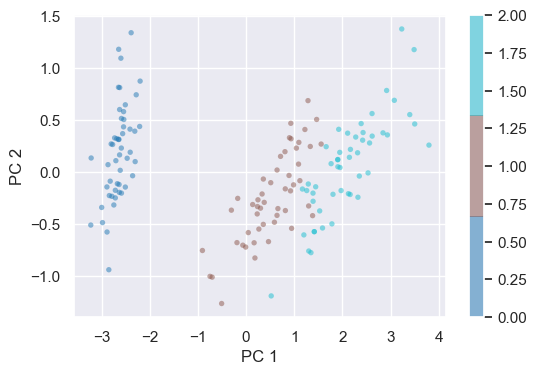

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # set the seaborn theme style
figure = plt.figure(dpi=100)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 3)) 
#colors determined by y, the true species of each iris flower 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar();

- Clustering

    Given $X\in \mathbb{R}^{n\times p}$, finding a partition of the dataset into $K$ groups such that 
    - data within the same group are similiar;
    - data from different groups are dissimiliar.

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0) #call k-means clustering algorithm
y_km = kmeans.fit_predict(X)
y_km # the groups assigned by algorithm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

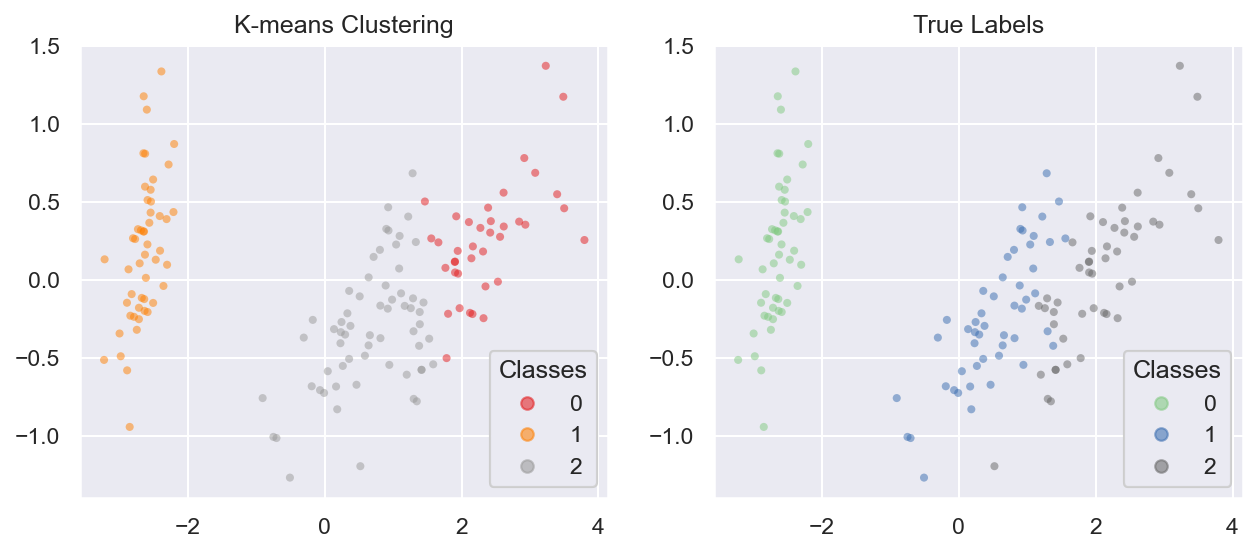

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150, figsize=(10,4))

fig1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1],c=y_km, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Set1', 3))
fig2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 3))
ax1.set_title('K-means Clustering')
legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Classes")
ax2.add_artist(legend2)

Question: What is the difference between clustering and classification? Can you try classification on Iris data with pycaret right now?

In [ ]:
# try classification with pycaret for Iris data by yourself!